In [13]:

#Loading required libraries.
import pandas as pd
import numpy as np
import re
import string
from pprint import pprint
from collections import Counter
import keras
import os

from keras.layers import Embedding
import tensorflow as tf

from keras.datasets import imdb
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import regularizers
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras import layers

import matplotlib.pyplot as plt

#Loading nltk library and its packages for text processing.
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

#Downloading some necessary word lists.
nltk.download('wordnet')
nltk.download('stopwords')

#Downloading all dependencies and corpora.
#nltk.download()
#nltk.download('all', halt_on_error=False)

#Importing pattern and its dependencies.
#import pattern
#from pattern.en import tag
#from pattern.en import parse
#from pattern.en import pprint



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
#Reading Training and Testing Datasets.
raw_data = pd.read_csv("/content/drive/My Drive/Colab_Datasets/Tweets_Data/train.csv")
#test_data = pd.read_csv("C:/Users/Bhair/OneDrive - University of Oklahoma/Master_of_Science_Data/Data Science Practice/Twitter Sentiment Analysis/Data/tweet-sentiment-extraction/test.csv")


#Contraction directory.
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}



#Customized stop words.
stop_words = {'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 
              'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 
              'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'he', 'her', 'here', 
              'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'it', "it's", 'its', 
              'itself', 'just', 'm', 'ma', 'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'off', 'on', 
              'once', 'only', 'or', 'other', 'our',  'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 
              'shan', "shan't", 'she', "she's", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 
              'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 
              'too', 'under', 'until', 'up', 've', 'very', 'we', 'while', 'with', 'y', 'you', "you'd", "you'll", 
              "you're", "you've", 'your', 'yours', 'yourself', 'yourselves'}



#Function for expanding contractions using above dictonary of contractions.
def expand_contractions(sentence, contraction_mapping):
    #Creating a list of contraction keys.
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags = re.IGNORECASE|re.DOTALL)
    
    #Function for expanding the contractions.
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = (contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower()))
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
    expanded_sentence = contractions_pattern.sub(expand_match, sentence)
    return expanded_sentence



#Function for creating a list ofstrings from the input. It creates different elements in the list if there is a space.
#Basically, a sentence will be converted into a list of words.
def words(text): 
  return re.findall(r'\w+', text.lower())

#Reading the file with vocabulary.
WORDS = Counter(words(open('/content/drive/My Drive/Colab_Datasets/Tweets_Data/big.txt').read()))

#Function for calculating probability of the given word to find in the vocabulary.
def P(word, N = sum(WORDS.values())): 
    "Probability of `word`."
    #WORDS[word] gives the count of word
    #N is total number of words in the vocabulary.
    return WORDS[word] / N

#Main function which should be called for word correction.
def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key = P)

#Function for genetraing all possible real words from given string.
def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

#Function for editing given string. This returns words which are one edit away from input string.
#The function edits1 returns a set of all the edited strings (whether words or not) that can be made with one simple edit: 
#a simple edit to a word is a deletion (remove one letter), a transposition (swap two adjacent letters), a replacement (change one letter to another) or an insertion (add a letter).
#The output of this function can be a big set. For a word of length n, there will be n deletions, n-1 transpositions, 
#26n alterations, and 26(n+1) insertions, for a total of 54n+25 (of which a few are typically duplicates)
def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    #Splitting the letters of a word to form a combination.
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

#Function for generating set of words which are two edits away from input string.
def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))


#Function for converting a list to a string.
def listToString(inlist):
    #Initialize an empty string.
    string = " "
    return (string.join(inlist))




#Function for preprocessing and normalizing text data.
def data_normalization(indata):
    #Setting stop word variable using NLTK package.
    stopWords = set(stopwords.words('english'))
    
    #Creating list of punctuations.
    punctuations = [".", ",", "!", "`", "...", "****", ":", "(", ")", "?", "-", "{", "}", "[", "]", ";", "/", "+", "<", 
               ">", "|", "=" "_", "^", "@", "#", "$", "%", "~", "'", ".."]
    
    #Regular expression tokenizer with only alphanumeric contents.
    Token_Pattern = r'\w+'
    regex_wt = nltk.RegexpTokenizer(pattern = Token_Pattern, gaps = False)

    #Listing out all contractions.
    contaction_keys = list(CONTRACTION_MAP.keys())

    #Declaring list for storing lemmatized tweets.
    lemmatized_words = []
    for i in range(len(indata)):
        #Condition for empty tweets.
        if (str(indata[i]) == "nan"):
            #Fake strink in the blank tweet.
            indata[i] = "NA"
        #Expanding contractions.
        text_segment = indata[i].replace("`", "'")
        expanded_tweets = expand_contractions(text_segment, CONTRACTION_MAP)
        #Removing URL links from tweets.
        expanded_tweets = re.sub(r'http\S+', '', expanded_tweets, flags = re.MULTILINE)
        #print("After contractions: ", expanded_tweets)
        #Tokenizing the words.
        tokens = regex_wt.tokenize(expanded_tweets)
        #Declaring list for lemmatized words.
        lemm_list = []
        for word in tokens:
            #Condition for stopwords.
            #if (word not in stopWords):
            if (word not in stop_words):
                #Condition for punctuations.
                if (word not in punctuations):
                    #Correcting the word.
                    #Not using this function because its not correcting words properly. Need to find more accurate way!
                    #corrected_spell = correction(word)
                    corrected_spell = word
                    #Converting all letters to lower form.
                    corrected_spell = corrected_spell.lower()
                    #Lemmatizing words.
                    lemm_list.append(wordnet_lemmatizer.lemmatize(corrected_spell, pos = "v"))
        #Converting the lemmatized word's (document) list to a string.
        lemm_string = listToString(lemm_list)
        lemmatized_words.append(lemm_string)
    return lemmatized_words


#Function for extracting features from given data. There are three options of extraction methods are given:
#Those are Bag of Words-based frequencies, occurrences, and TF-IDF based features
def build_feature_matrix(documents, feature_type='frequency', ngram_range=(1, 1), min_df=0.0, max_df=1.0):
    feature_type = feature_type.lower().strip()
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")
    
    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    return (vectorizer, feature_matrix)


In [15]:
#Normalizing tweets.
normalized_tweets = data_normalization(raw_data['text'][:20000])


#Vectorizing the sentiment labels to be -1, 0 and 1 for negative, neutral and positive respectively.
vectorized_sentiments = []
for labels in raw_data['sentiment'][:20000]:
  if labels == 'negative':
    ind_lab = -1
  elif labels == 'neutral':
    ind_lab = 0
  elif labels == 'positive':
    ind_lab = 1
  else:
    ind_lab = 'Error'
  vectorized_sentiments.append(ind_lab)



#Limiting the size of each tweet for 100 words.
maxlen = 100
#Training on only 200 sampeles.
training_samples = 15000
#Validating on 10000 samples.
validation_samples = 5000
#Considering only top 10000 words from dataset.
max_words = 10000

#Tokenizing the words.
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(normalized_tweets)
sequences = tokenizer.texts_to_sequences(normalized_tweets)

#Finding the index for each unique words.
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

#Padding each tokenized tweet to be of same length.
data = pad_sequences(sequences, maxlen = maxlen)
labels = np.asarray(vectorized_sentiments)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

#Shuffling the dataset before splitting into train and validation sets.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

#Splitting the train and validation set.
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train_raw = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val_raw = labels[training_samples: training_samples + validation_samples]

#Converting labels to one hot encoding of three categories.
y_train = tf.keras.utils.to_categorical(y_train_raw, 3)
y_val = tf.keras.utils.to_categorical(y_val_raw, 3)



Found 18066 unique tokens.
Shape of data tensor: (20000, 100)
Shape of label tensor: (20000,)


In [16]:

#Path for the directory.
glove_dir = '/content/drive/My Drive/Colab_Datasets/Pretrained_Networks'
embeddings_index = {}

#opening teh file with pretrained words.
#f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
f = open(os.path.join(glove_dir, 'glove.twitter.27B.100d.txt'))

#Reading each word vectors.
for line in f:
  values = line.split()
  #Storing word as index and its 100d vector as values in python dictonary.
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))



Found 1193514 word vectors.


In [21]:

list_of_unidentified_words = []
#Dimensions of embedding (word vector length).
embedding_dim = 100
#Defining a matrix of size (max words, dimensions)
embedding_matrix = np.zeros((max_words, embedding_dim))

#Extracting word vectors for all words from our dataset.
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    #If the word is missing frim pretrained network, then it will be filled with all zeros.
    if embedding_vector is not None:
      #print(words)
      list_of_unidentified_words.append(words)
      embedding_matrix[i] = embedding_vector


In [41]:

#Constructing neural network.
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu', kernel_regularizer = regularizers.l1(0.00005)))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 128, activation = 'relu', kernel_regularizer = regularizers.l1(0.00005)))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 64, activation = 'relu', kernel_regularizer = regularizers.l1(0.00005)))
model.add(layers.Dropout(0.5))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 3, activation = 'sigmoid'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)               

In [42]:

#Substituting the parameter values of embedding matrix for embedding layer.
model.layers[0].set_weights([embedding_matrix])
#This layer will be non trainable for actual dataset.
model.layers[0].trainable = False

#Compiling the model.
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(x_train, y_train, 
                    epochs = 20, batch_size = 1400, 
                    validation_data = (x_val, y_val))

#Storing the model.
#model.save_weights('pre_trained_glove_model.h5')
model.save_weights('pre_trained_glove_model_rev.01.h5')


Epoch 1/20
11/11 [==============================] - 2s 162ms/step - loss: 1.3625 - acc: 0.3936 - val_loss: 1.2147 - val_acc: 0.4844
Epoch 2/20
11/11 [==============================] - 1s 123ms/step - loss: 1.1718 - acc: 0.4734 - val_loss: 1.0735 - val_acc: 0.5208
Epoch 3/20
11/11 [==============================] - 1s 120ms/step - loss: 1.0846 - acc: 0.5273 - val_loss: 1.0206 - val_acc: 0.5710
Epoch 4/20
11/11 [==============================] - 1s 121ms/step - loss: 1.0304 - acc: 0.5731 - val_loss: 0.9890 - val_acc: 0.5982
Epoch 5/20
11/11 [==============================] - 1s 121ms/step - loss: 0.9952 - acc: 0.5974 - val_loss: 0.9559 - val_acc: 0.6232
Epoch 6/20
11/11 [==============================] - 1s 119ms/step - loss: 0.9596 - acc: 0.6195 - val_loss: 0.9548 - val_acc: 0.6234
Epoch 7/20
11/11 [==============================] - 1s 121ms/step - loss: 0.9220 - acc: 0.6453 - val_loss: 0.9442 - val_acc: 0.6246
Epoch 8/20
11/11 [==============================] - 1s 118ms/step - loss: 0.

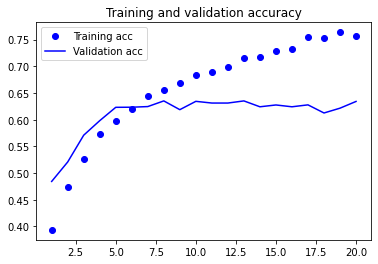

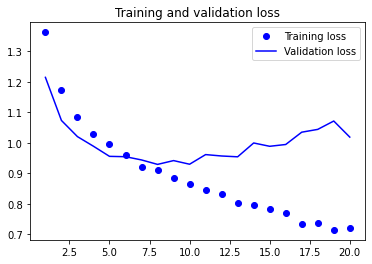

In [43]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 1.0524 - acc: 0.4374 - val_loss: 0.9293 - val_acc: 0.5656
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.9441 - acc: 0.5453 - val_loss: 0.8748 - val_acc: 0.5920
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.8860 - acc: 0.5895 - val_loss: 0.8686 - val_acc: 0.5900
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.8489 - acc: 0.6139 - val_loss: 0.8728 - val_acc: 0.5950
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.8162 - acc: 0.6290 - val_loss: 0.8698 - val_acc: 0.5928
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.7872 - acc: 0.6498 - val_loss: 0.8629 - val_acc: 0.6066
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.7639 - acc: 0.6631 - val_loss: 0.8792 - val_acc: 0.5968
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - 

In [18]:
len(list_of_unidentified_words)

8849

In [8]:
len(word_index.items())

18066

In [24]:
embeddings_index.get('agg')

array([-0.36036  , -0.18962  , -0.18368  ,  0.18757  ,  0.10925  ,
       -0.041525 , -1.2546   ,  0.49848  ,  0.14818  ,  0.28437  ,
        0.050256 ,  0.30767  , -0.79367  , -0.29981  ,  0.35146  ,
       -1.1458   ,  0.3633   ,  0.83614  ,  0.034547 , -0.67912  ,
       -0.24467  ,  0.24869  , -0.10471  , -0.26492  , -0.47051  ,
       -0.57345  ,  0.063439 ,  0.04795  , -0.76343  ,  0.14302  ,
       -0.63186  , -0.034172 ,  0.40279  , -0.071427 , -0.021817 ,
       -0.079377 , -0.25814  ,  0.30578  ,  0.29543  ,  0.52733  ,
       -0.25228  , -0.41207  ,  0.72592  , -0.57233  , -0.28     ,
       -0.21304  ,  0.33097  ,  1.1646   ,  0.51199  ,  0.67434  ,
       -0.38152  ,  0.76354  ,  0.26524  ,  0.38117  ,  0.48921  ,
        0.068645 ,  0.035555 , -0.044574 , -0.097628 ,  0.33642  ,
        0.013261 ,  0.33738  , -0.035554 ,  0.21267  ,  0.36631  ,
       -0.022687 , -0.619    , -0.009019 ,  0.022235 ,  0.31946  ,
       -0.51781  ,  0.11821  ,  0.49789  ,  0.59597  , -0.7468